In [0]:
# The imports for our usage, we are using tensorflow and numpy
import tensorflow as tf
import numpy as np
# we are also importing Ipython to use it in jupyter and visualize easily
import PIL.Image
from io import BytesIO
# two dipslay functions from Ipython
from IPython.display import Image, display

In [0]:
# creating a new function called DisplayFractal
# It will take the parameters: image data (a) and the format 'JPeg'
def DisplayFractal(a, fmt='jpeg'):
    # Display an array of iteration counts as a colorful picture of a fractal
    # again: -Array of iteration counts as a picture of a fractal-
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
    # then display the image once when we have the iteration counts
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))


In [0]:
# Creates a new session in tensorflow
sess=tf.InteractiveSession()
# creates X and Y, both are numpy grids that define the ratios of our image
# try messing with the values and you'll understand what it does
Y, X = np.mgrid[-1.3:1.3:0.005, -2.5:0.8:0.005]
# this is the Z axis, almost like the ratio of distortion. 
# Change the 1j to 2j and see what it does
Z = X+1j*Y
# then we create our tensorflow constants/ Variables that tensorflow can utilize
# xs is equal to a tf constant, the astype function makes it a 64 bit complex values
# this only works on scalars, that's why we assign it to a "tf" constant
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
# ns is a tf variable with all elements set to zero. using tf.zeros_like
ns = tf.Variable(tf.zeros_like(xs, tf.float32))


In [0]:
# gotta initialize those variables
tf.global_variables_initializer().run()

In [0]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs
# checks to see if we have diverged with the new value
not_diverged = tf.abs(zs_) < 4

In [0]:
# Operation to update the zs and the iteration count.
# remember ns is the empty tensor with zeros
step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    )
# run the step function a few times
# try messing with the iterations and see exactly what happens
for i in range(400):
    step.run()


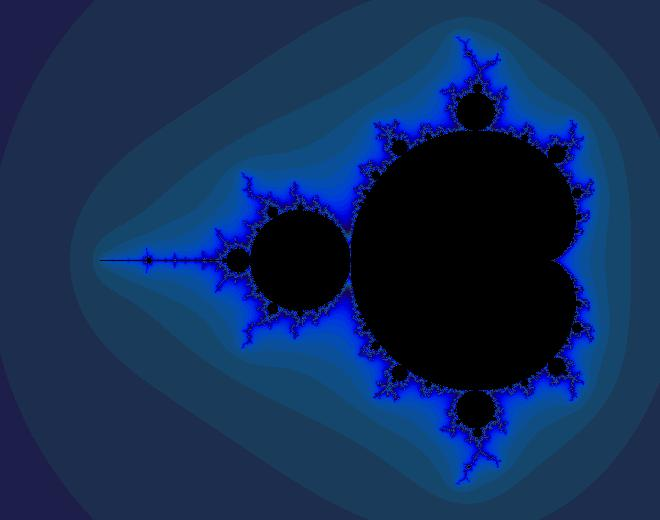

In [0]:
DisplayFractal(ns.eval())